In [35]:
import netCDF4
import numpy as np

In [3]:
datafile = "/Users/seth.urion/src/Skagit-IBM/reepicheep/test3/output_4.nc"

In [4]:
ds = netCDF4.Dataset(datafile)

In [5]:
ds.variables

{'sampleSiteID': <class 'netCDF4._netCDF4.Variable'>
 int32 sampleSiteID(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'sampleTime': <class 'netCDF4._netCDF4.Variable'>
 int32 sampleTime(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'samplePop': <class 'netCDF4._netCDF4.Variable'>
 int32 samplePop(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'sampleMeanMass': <class 'netCDF4._netCDF4.Variable'>
 float32 sampleMeanMass(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'sampleMeanLength': <class 'netCDF4._netCDF4.Variable'>
 float32 sampleMeanLength(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of 9.9692099683

In [6]:
import xarray as xr
import pandas as pd

In [7]:
dsx = xr.open_dataset(datafile)
df = dsx.to_dataframe()

In [8]:
df.to_csv('./reepicheep/test3/output_4.csv')

In [9]:
df[df.sampleMeanSpawnTime > 0]

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
76,76,12,1,1.138148,52.974731,11.000000
1025,1025,12,6,1.095445,48.378643,0.666667
1026,1026,12,1,1.048230,47.908863,1.000000
1028,1028,12,3,1.110139,47.635929,1.666667
1029,1029,12,2,0.970374,47.913208,1.500000
...,...,...,...,...,...,...
376349,1865,3708,1,2.438164,62.760475,2543.000000
376439,1955,3708,1,0.411970,36.276478,2690.000000
376493,2009,3708,1,0.337554,34.124954,2864.000000


In [10]:
big_file = '/Users/seth.urion/src/Skagit-IBM/reepicheep/test2/summary_3.nc'
dsx2 = xr.open_dataset(big_file)
# df2 = dsx2.to_dataframe()

In [11]:
dsx2

<xarray.Dataset>
Dimensions:               (n: 6278381, monitoringPoints: 281,
                           historyLength: 3984)
Dimensions without coordinates: n, monitoringPoints, historyLength
Data variables:
    recruitTime           (n) int32 ...
    exitTime              (n) int32 ...
    entryForkLength       (n) float32 ...
    entryMass             (n) float32 ...
    finalForkLength       (n) float32 ...
    finalMass             (n) float32 ...
    finalStatus           (n) int32 ...
    monitoringPopulation  (monitoringPoints, historyLength) int32 ...
    monitoringDepth       (monitoringPoints, historyLength) float32 ...
    monitoringTemp        (monitoringPoints, historyLength) float32 ...
    monitoringPointIDs    (monitoringPoints) int32 ...

In [12]:
dsx2.head()

<xarray.Dataset>
Dimensions:               (n: 5, monitoringPoints: 5, historyLength: 5)
Dimensions without coordinates: n, monitoringPoints, historyLength
Data variables:
    recruitTime           (n) int32 ...
    exitTime              (n) int32 ...
    entryForkLength       (n) float32 ...
    entryMass             (n) float32 ...
    finalForkLength       (n) float32 ...
    finalMass             (n) float32 ...
    finalStatus           (n) int32 ...
    monitoringPopulation  (monitoringPoints, historyLength) int32 ...
    monitoringDepth       (monitoringPoints, historyLength) float32 ...
    monitoringTemp        (monitoringPoints, historyLength) float32 ...
    monitoringPointIDs    (monitoringPoints) int32 ...

In [13]:
dsx2.data_vars

Data variables:
    recruitTime           (n) int32 ...
    exitTime              (n) int32 ...
    entryForkLength       (n) float32 ...
    entryMass             (n) float32 ...
    finalForkLength       (n) float32 ...
    finalMass             (n) float32 ...
    finalStatus           (n) int32 ...
    monitoringPopulation  (monitoringPoints, historyLength) int32 ...
    monitoringDepth       (monitoringPoints, historyLength) float32 ...
    monitoringTemp        (monitoringPoints, historyLength) float32 ...
    monitoringPointIDs    (monitoringPoints) int32 ...

In [13]:
dsx2.groupby(dsx2.finalStatus).count()

<xarray.Dataset>
Dimensions:               (finalStatus: 4, monitoringPoints: 281,
                           historyLength: 3984)
Coordinates:
  * finalStatus           (finalStatus) int32 0 1 3 4
Dimensions without coordinates: monitoringPoints, historyLength
Data variables:
    recruitTime           (finalStatus) int64 2112122 1632 4164104 523
    exitTime              (finalStatus) int64 2112122 1632 4164104 523
    entryForkLength       (finalStatus) int64 2112122 1632 4164104 523
    entryMass             (finalStatus) int64 2112122 1632 4164104 523
    finalForkLength       (finalStatus) int64 2112122 1632 4164104 523
    finalMass             (finalStatus) int64 2112122 1632 4164104 523
    monitoringPopulation  (finalStatus, monitoringPoints, historyLength) int64 ...
    monitoringDepth       (finalStatus, monitoringPoints, historyLength) int64 ...
    monitoringTemp        (finalStatus, monitoringPoints, historyLength) int64 ...
    monitoringPointIDs    (finalStatus, monitoringPoints) int64 1 1 1 ... 1 1 1

In [30]:
"""`status[n]`: ints, current/final status of each fish
        - 0: Alive
        - 1: Dead from mortality risk
        - 2: Dead from stranding
        - 3: Dead from starvation
        - 4: Exited"""


'`status[n]`: ints, current/final status of each fish\n        - 0: Alive\n        - 1: Dead from mortality risk\n        - 2: Dead from stranding\n        - 3: Dead from starvation\n        - 4: Exited'

In [16]:
dsx2.groupby(round(dsx2.finalForkLength, 0)).count()

TypeError: type DataArray doesn't define __round__ method

In [15]:
dsx2.finalForkLength.values

array([36.83105 , 40.4159  , 32.07501 , ..., 53.74385 , 52.806934,
       61.05795 ], dtype=float32)

In [19]:
fl_bins = [75, 85]
dsx2.groupby_bins(dsx2.finalForkLength, fl_bins).count()

<xarray.Dataset>
Dimensions:               (finalForkLength_bins: 1, monitoringPoints: 281,
                           historyLength: 3984)
Coordinates:
  * finalForkLength_bins  (finalForkLength_bins) object (75, 85]
Dimensions without coordinates: monitoringPoints, historyLength
Data variables:
    recruitTime           (finalForkLength_bins) int64 2583
    exitTime              (finalForkLength_bins) int64 2583
    entryForkLength       (finalForkLength_bins) int64 2583
    entryMass             (finalForkLength_bins) int64 2583
    finalForkLength       (finalForkLength_bins) int64 2583
    finalMass             (finalForkLength_bins) int64 2583
    finalStatus           (finalForkLength_bins) int64 2583
    monitoringPopulation  (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringDepth       (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringTemp        (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringPointIDs    (finalForkLength_bins, monitoringPoints) int64 1 ... 1

In [46]:
graph = np.histogram(np.array(dsx2.finalForkLength).astype(int), [15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125])

In [49]:
from matplotlib import pyplot as plt


Matplotlib is building the font cache; this may take a moment.


<function matplotlib.pyplot.show(close=None, block=None)>

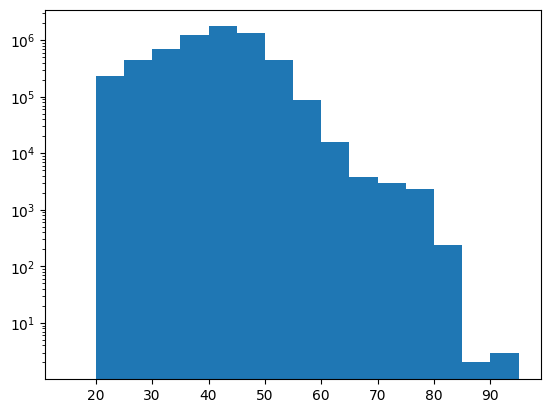

In [57]:
plt.hist(np.array(dsx2.finalForkLength).astype(int), [x for x in range(15, 100, 5)])
plt.yscale('log')
plt.show

In [ ]:
plt.hist(np.array(dsx2.finalForkLength).astype(int), [x for x in range(15, 100, 5)])
plt.yscale('log')
plt.show

In [69]:
dsx2.where(dsx2.finalStatus == 4)

: 